In [13]:
%matplotlib inline
import spartan2.spartan as st

In [14]:
# set the computing engine
st.config(st.engine.SINGLEMACHINE)

In [15]:
# load graph data
data = st.loadTensor(name = "example_graph", path = "inputData/", col_types = [int, int, int], hasvalue=1)

Info: Tensor is loaded
           ----------------------
             attr     |	2
             values   |	1
             nonzeros |	1569207



In [16]:
graph = data.toGraph()

In [17]:
# create a eigen decomposition model
edmodel = st.decomposition.create(graph.sm, st.ed_policy.SVDS, "my_svds_model")

In [18]:
U,S,V = edmodel.run(k=2)

In [19]:
U.shape, S.shape, V.shape, U[:10], V[:10]

((33374, 2), (2,), (65911, 2), array([[ 2.48277982e-04,  2.47874891e-04],
        [-2.19158300e-04,  9.78766659e-05],
        [-3.41005622e-04,  9.96969966e-05],
        [-1.67891131e-02,  6.10638097e-03],
        [ 8.87094600e-04,  7.84294756e-04],
        [-2.22925004e-04,  3.00468034e-05],
        [-7.27574906e-05,  2.74464209e-04],
        [ 4.02940118e-04,  1.37985455e-04],
        [-1.28570390e-04,  3.70867734e-05],
        [-1.06159299e-02,  6.07279604e-03]]), array([[0.00054503, 0.00014602],
        [0.0016683 , 0.0006514 ],
        [0.0245407 , 0.01650477],
        [0.03269422, 0.03002005],
        [0.02649508, 0.02308551],
        [0.00414879, 0.00289192],
        [0.01080647, 0.00528723],
        [0.01754751, 0.02825361],
        [0.01064132, 0.004666  ],
        [0.00846382, 0.00423448]]))

In [22]:
# create a anomaly detection model
emmodel = st.anomaly_detection.create(graph, st.ad_policy.EAGLEMINE, "my_eaglemine_model")


In [23]:
du, dv = graph.degrees()

total shape: (33374, 2), valid samples:19500
Histogram Info:
	 Histogram shape: [64, 71]
	 #points: 19500, #mode: 2
Graph feature to histogram done!
histogram: temp/histogram.out;  hode2pos: temp/node2hcel.out;  hpos_avgfeat: temp/hcel2avgfeat.out
EagleMine algorithm
*****************
[0]. initialization and loading
*****************
[1]. WaterLevelTree

Construct raw-tree.
(47, 62):1
(46, 61):1
(46, 62):1
(47, 61):1
(12, 54):2
(11, 53):1
(11, 54):1
(12, 53):1
Info: maximum tree level: 8.999999999999998
Info: Level-Tree build done!

Refine tree structure.

+++++++++ 
a). tree contract
Info: Level-tree contract done!
Info: Contract level-tree:
Level tree basic information:
#node: 1, #level: 1
(node id): {@level, parent node, #childs, #elements}
|---- (0): 1.0, -1, None, 459 |-
dump done!

+++++++++ 
b). tree prune
Info: Level-tree prune done!
Info: Pruned level-tree:
Level tree basic information:
#node: 1, #level: 1
(node id): {@level, parent node, #childs, #elements}
|---- (0): 1.0, -1

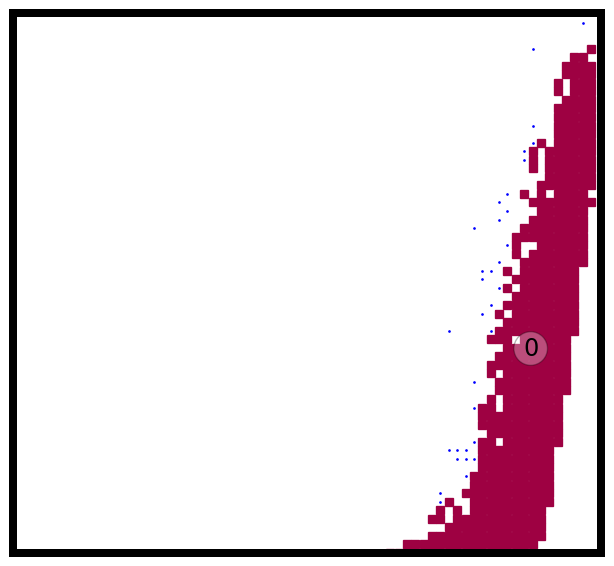

In [24]:
# run the eaglemine model
emmodel.run(U[:,0], du)

In [27]:
V.shape, dv.T.shape

((65911, 2), (65911, 1))

In [25]:
emmodel.run(V[:,0], dv.T)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [11]:
A, B = emmodel.nodes(n=0)

In [12]:
g = st.subgraph(data, A, B)